'''

=================================================

*Program ini dibuat untuk melakukan automatisasi pengolahan (cleaning) data text yang berguna untuk pemodelan model analisa sentimen serta visualisasi dari data tersebut.*

=================================================

'''

Topik : Faktor penyebab penyakit diabetes dari persebaran data.

Problem Statement : Masalah yang ingin diselesaikan adalah mengidentifikasi faktor-faktor utama penyebab diabetes melalui analisis data persebaran. Penyakit ini semakin meningkat di berbagai populasi, dan pemahaman yang lebih baik tentang faktor-faktor risiko ini akan membantu dalam upaya pencegahan dan pengelolaan penyakit.

 METODE SMART
    
   - SPESIFIC (Spesifik) :  Menentukan faktor-faktor penyebab penyakit diabetes pada populasi yang diteliti. Ini dapat mencakup faktor-faktor seperti pola makan, aktivitas fisik, riwayat keluarga, dan indeks massa tubuh (IMT).

   - MEASUREABLE  (Mengukur) : Mengukur hubungan antara faktor-faktor penyebab yang diidentifikasi dengan kejadian diabetes dalam kelompok populasi yang diobservasi. Misalnya, dapat mengukur persentase orang yang mengembangkan diabetes dalam kelompok yang memiliki faktor risiko tertentu.

   - ACHIEVEABLE (Dapat Dicapai) : Menganalisis data dari sumber yang tersedia, seperti data kesehatan masyarakat atau data survei, untuk mengidentifikasi faktor penyebab dan hubungannya dengan diabetes. Pastikan sumber data Anda dapat mendukung penelitian ini.

   - RELEVANT (Relevan) : Penelitian ini relevan karena diabetes adalah masalah kesehatan yang signifikan, dan memahami faktor penyebabnya dapat membantu dalam upaya pencegahan dan manajemen penyakit ini.
    
   - TIME BOUND (Terikat Waktu) : Menyelesaikan analisis data dan menyusun laporan penelitian dalam waktu setidaknya 6 bulan setelah pengumpulan data.

5W + 1H

-  What (Apa): Apa faktor penyebab dari penyakit diabetes?

-  Why (Mengapa): Mengapa kebanyakan yang terkenak diabetes dipengaruhi faktor dari rokok?

-  Who (Siapa): Siapa yang berpotensi terkenak penyakit diabetes? Ini bisa berupa populasi yang diteliti, seperti kelompok umur atau jenis kelamin.

-  Where (Dimana): Dimana letak potensi untuk orang tersebut di nyatakan terkena diabetes.

-  When (Kapan): Diumur berapa orang terkena penyakit diabetes?

-  How (Bagaimana): Bagaimana cara agar orang terhindar dari penyakit diabetes?

In [3]:
# Mengimport package
import pandas as pd 
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import requests

# inisialisasi driver Selenium menggunakan Chrome
driver = webdriver.Chrome()

# Link ke Dataset
url='https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset'
driver.get(url)
html = driver.page_source

soup = BeautifulSoup(html, "html.parser")
print(soup.prettify()[:700])

<html lang="en">
 <head>
  <title>
   Diabetes Health Indicators Dataset
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow" name="robots"/>
  <meta content="253,680 survey responses from cleaned BRFSS 2015 + balanced dataset" name="description"/>
  <meta content="no-cache" name="turbolinks-cache-control"/>
  <meta content="health,beginner,classification,diabetes,public health" name="keywords"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0" name="viewport"/>
  <meta content="#008ABC" name="theme-color"/>
  <script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.lb.en.L92w_vMR5kE.O/m=auth2,client/rt=j


Data Loading

In [14]:
# Load dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [15]:
# Mengambil sampel acak 100 baris dari DataFrame
df.sample(100)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
105372,0.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,7.0,4.0,4.0
166840,0.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
185960,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
253234,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,6.0,6.0
165713,0.0,1.0,1.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30623,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,4.0,2.0
12096,0.0,1.0,0.0,1.0,46.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,4.0,6.0
130448,0.0,0.0,1.0,1.0,34.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,2.0,0.0,1.0,10.0,5.0,7.0
3839,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,5.0,7.0


In [16]:
# Mengambil 10 baris pertama dari DataFrame 
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [17]:
# Menampilkan data dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [18]:
# Mengecek missing values dalam sebuah objek DataFrame
df.isna()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Menghitung jumlah missing values dalam setiap kolom DataFrame
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [20]:
# Mengecek nama-nama kolom dalam DataFrame
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [21]:
# Mengubah tipe data age menjadi integer
df['Age'] = df['Age'].astype(int)

# Mengambil sampel setelah merubah Age menjadi integer dari DataFrame
df.sample(10)

# 13-level Age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
11292,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12,6.0,8.0
238633,0.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,5,5.0,8.0
95786,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,2.0,1.0,0.0,0.0,11,4.0,2.0
187802,0.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,10.0,0.0,0.0,1.0,8,6.0,7.0
46437,0.0,0.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8,4.0,5.0
128485,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13,6.0,6.0
183652,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,30.0,25.0,0.0,1.0,10,6.0,7.0
210009,0.0,0.0,0.0,1.0,23.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13,6.0,8.0
12106,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10,4.0,6.0
155777,1.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,10.0,0.0,0.0,0.0,13,3.0,3.0


In [22]:
# Mengubah isi kolom Smoker dengan 0 = False dan 1 = False
df['Smoker'] = df['Smoker'].replace({1.0: True, 0.0: False})

# Mengambil sampel setelah merubah Smoker
df.sample(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
142089,0.0,1.0,0.0,1.0,23.0,True,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8,4.0,6.0
248481,0.0,0.0,1.0,1.0,27.0,False,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9,6.0,8.0
243766,0.0,1.0,1.0,1.0,28.0,False,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6,6.0,8.0
244697,0.0,0.0,0.0,1.0,27.0,False,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8,4.0,7.0
212039,1.0,1.0,0.0,1.0,35.0,False,1.0,1.0,1.0,0.0,...,1.0,0.0,3.0,6.0,6.0,1.0,0.0,9,3.0,1.0
99615,1.0,1.0,0.0,1.0,32.0,True,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,11,3.0,4.0
142565,1.0,0.0,0.0,1.0,32.0,True,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11,5.0,7.0
110997,0.0,0.0,0.0,1.0,26.0,False,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,7,6.0,6.0
92601,0.0,0.0,0.0,1.0,20.0,False,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,2,6.0,6.0
251141,0.0,1.0,1.0,1.0,25.0,False,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,10.0,0.0,1.0,1.0,8,6.0,5.0


In [23]:
# Mengubah isi kolom Stroke dengan 0 = No dan 1 = Yes
df['Stroke'] = df['Stroke'].replace({1.0: True, 0.0: False})

# Mengambil sampel setelah merubah Stroke
df.sample(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
198677,0.0,0.0,0.0,1.0,43.0,False,False,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10,5.0,7.0
200029,0.0,0.0,0.0,1.0,33.0,True,False,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10,6.0,6.0
182673,0.0,1.0,1.0,1.0,28.0,True,False,0.0,1.0,1.0,...,1.0,1.0,3.0,3.0,3.0,0.0,1.0,7,6.0,1.0
241051,0.0,0.0,0.0,1.0,20.0,True,False,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7,5.0,8.0
64927,0.0,1.0,0.0,1.0,24.0,True,False,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11,3.0,4.0
235896,0.0,1.0,0.0,1.0,35.0,False,False,1.0,1.0,1.0,...,1.0,1.0,3.0,0.0,2.0,0.0,0.0,13,2.0,3.0
209846,1.0,1.0,1.0,1.0,31.0,False,False,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11,4.0,4.0
146105,0.0,0.0,0.0,1.0,35.0,True,False,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,9,5.0,4.0
223196,0.0,0.0,0.0,1.0,29.0,True,False,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,3,6.0,8.0
80206,1.0,1.0,0.0,1.0,33.0,False,False,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10,5.0,5.0


In [24]:
# Mengubah isi kolom HeartDiseaseorAttack dengan 0 = No dan 1 = Yes
# df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].replace({1.0: True, 0.0: False})
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype(int)

# Mengambil sampel setelah merubah HeartDiseaseorAttack
df.sample(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
117115,0.0,0.0,0.0,1.0,26.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7,6.0,8.0
17494,0.0,1.0,1.0,1.0,28.0,True,False,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10,6.0,8.0
160163,0.0,1.0,0.0,1.0,26.0,True,False,1,0.0,1.0,...,1.0,0.0,5.0,7.0,30.0,1.0,1.0,13,5.0,6.0
155879,0.0,1.0,1.0,1.0,25.0,True,True,0,1.0,0.0,...,1.0,0.0,4.0,0.0,3.0,0.0,0.0,10,2.0,1.0
181631,0.0,1.0,1.0,1.0,31.0,False,False,0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11,5.0,4.0
67359,0.0,1.0,1.0,1.0,18.0,True,False,0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,12,5.0,5.0
34969,0.0,0.0,0.0,1.0,23.0,False,False,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,6.0,8.0
188393,0.0,1.0,1.0,1.0,30.0,True,False,0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,5,4.0,2.0
173827,0.0,0.0,1.0,1.0,19.0,True,False,0,1.0,0.0,...,1.0,0.0,3.0,2.0,0.0,0.0,1.0,9,6.0,8.0
238976,1.0,0.0,0.0,1.0,26.0,True,False,0,1.0,1.0,...,1.0,0.0,2.0,2.0,5.0,0.0,1.0,3,4.0,8.0


In [25]:
# Mengubah isi kolom Diabetes_binary dengan 0 = no diabetes 1 = prediabetes 2 = diabetes
df['Diabetes_binary'] = df['Diabetes_binary'].replace({0: 'no diabetes', 1: 'prediabetes', 2: 'diabetes'})

df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,no diabetes,1.0,1.0,1.0,40.0,True,False,0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9,4.0,3.0
1,no diabetes,0.0,0.0,0.0,25.0,True,False,0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7,6.0,1.0
2,no diabetes,1.0,1.0,1.0,28.0,False,False,0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9,4.0,8.0
3,no diabetes,1.0,0.0,1.0,27.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11,3.0,6.0
4,no diabetes,1.0,1.0,1.0,24.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,no diabetes,1.0,1.0,1.0,45.0,False,False,0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5,6.0,7.0
253676,prediabetes,1.0,1.0,1.0,18.0,False,False,0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11,2.0,4.0
253677,no diabetes,0.0,0.0,1.0,28.0,False,False,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,5.0,2.0
253678,no diabetes,1.0,0.0,1.0,23.0,False,False,0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7,5.0,1.0


In [26]:
# Mengganti nilai 1 dengan "Male" dan 0 dengan "Female" pada kolom "Sex"
df['Sex'].replace({1: 'Male', 0: 'Female'}, inplace=True)

df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,no diabetes,1.0,1.0,1.0,40.0,True,False,0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,Female,9,4.0,3.0
1,no diabetes,0.0,0.0,0.0,25.0,True,False,0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,Female,7,6.0,1.0
2,no diabetes,1.0,1.0,1.0,28.0,False,False,0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,Female,9,4.0,8.0
3,no diabetes,1.0,0.0,1.0,27.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,Female,11,3.0,6.0
4,no diabetes,1.0,1.0,1.0,24.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,Female,11,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,no diabetes,1.0,1.0,1.0,45.0,False,False,0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,Male,5,6.0,7.0
253676,prediabetes,1.0,1.0,1.0,18.0,False,False,0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,Female,11,2.0,4.0
253677,no diabetes,0.0,0.0,1.0,28.0,False,False,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,Female,2,5.0,2.0
253678,no diabetes,1.0,0.0,1.0,23.0,False,False,0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,Male,7,5.0,1.0


In [28]:
# menampilkan type
df.dtypes

Diabetes_binary          object
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                     bool
Stroke                     bool
HeartDiseaseorAttack      int32
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                      object
Age                       int32
Education               float64
Income                  float64
dtype: object

In [29]:
# menyimpan data bersih kedalam CSV
df.to_csv('data_bersih.csv', index=False)
print('Data Successfully Saved')

Data Successfully Saved


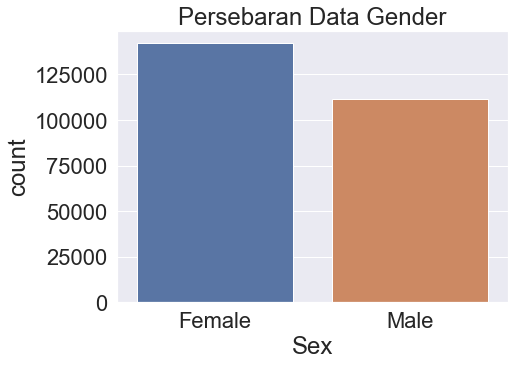

In [30]:
# Import beberapa package untuk mem visualisasikan data
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_bersih.csv')

# Visualisasi Persebaran Data Gender
plt.figure(figsize=(7,5))
sns.set(font_scale=2)
sns.countplot(x='Sex',data=df);
plt.title("Persebaran Data Gender");

In [31]:
# Jumlah masing - value pada kolom Sex
df.Sex.value_counts()

Female    141974
Male      111706
Name: Sex, dtype: int64

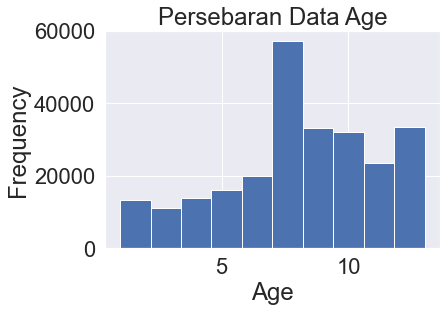

In [32]:
# Visualisasi Persebaran Data Age
# 13-level Age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

plt.hist(df['Age']);
plt.title('Persebaran Data Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

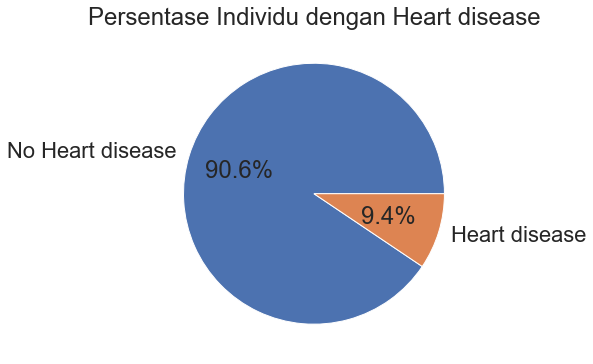

In [33]:
# Visualisasi persentase HeartDiseaseorAttack 
heart_disease_counts = df['HeartDiseaseorAttack'].value_counts()

heart_disease_percentage = heart_disease_counts / len(df) * 100

plt.figure(figsize=(10,6))
labels = ['No Heart disease', 'Heart disease']
plt.pie(heart_disease_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Persentase Individu dengan Heart disease')

plt.show()

In [34]:
# Jumlah masing - masing value pada kolom HeartDiseaseorAttack, 0 = no 1 = yes
df.HeartDiseaseorAttack.value_counts()

0    229787
1     23893
Name: HeartDiseaseorAttack, dtype: int64

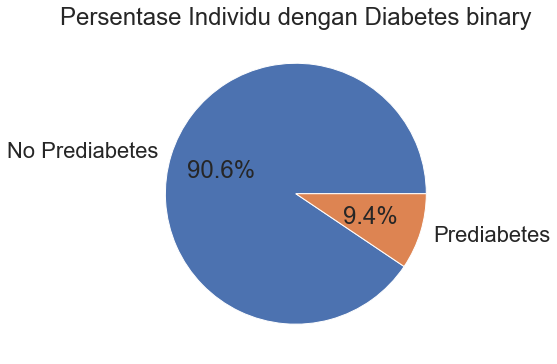

In [37]:
# Visualisasi persentase Diabetes binary

prediabetes_counts = df['Diabetes_binary'].value_counts()

prediabetes_percentage = heart_disease_counts / len(df) * 100

plt.figure(figsize=(10,6))
labels = ['No Prediabetes', 'Prediabetes']
plt.pie(prediabetes_percentage, labels=labels, autopct='%1.1f%%')

plt.title('Persentase Individu dengan Diabetes binary')

plt.show()

Perbedaan utama antara prediabetes dan diabetes adalah tingkat gula darah yang lebih tinggi pada diabetes dan fakta bahwa prediabetes adalah tahap awal di mana seseorang memiliki risiko lebih tinggi untuk mengembangkan diabetes.

In [40]:
# Pada dataset 0 = no diabetes 1 = prediabetes 2 = diabetes
# Jumlah masing - masing value pada kolom Diabetes binary 
df.Diabetes_binary.value_counts()

no diabetes    218334
prediabetes     35346
Name: Diabetes_binary, dtype: int64

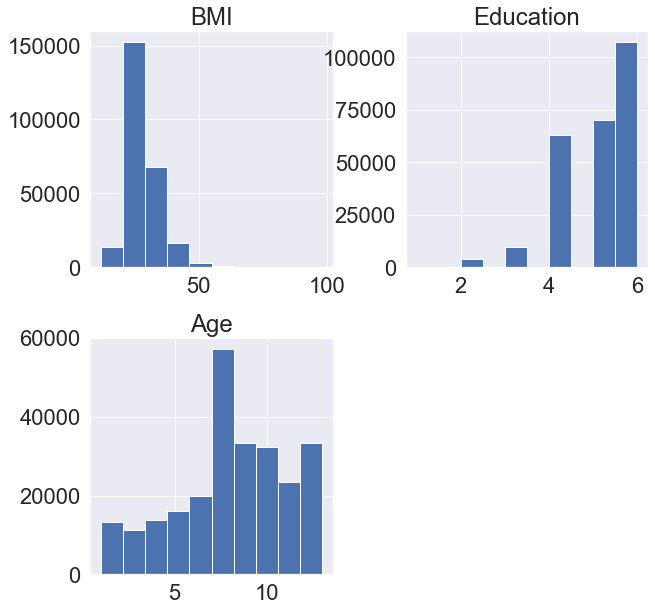

In [42]:
df[['BMI','Education','Age']].hist(figsize=(10,10))
plt.show()

In [44]:
# Kelompokkan data berdasarkan kolom 'Smoker' dan hitung rata-rata BMI
average_bmi_by_smoker = df.groupby('Smoker')['BMI'].mean()

# Hasilnya akan berisi rata-rata BMI untuk perokok (1.0) dan non-perokok (0.0)
print(average_bmi_by_smoker)

Smoker
False    28.300976
True     28.484625
Name: BMI, dtype: float64


In [46]:
# Menghitung rata-rata BMI (Body Mass Index)
mean = df['BMI'].mean()

# Hasilnya akan berisi rata-rata BMI dalam dataset
print('Rata-Rata BMI:', mean)

Rata-Rata BMI: 28.382363607694735


What (Apa): Apa faktor penyebab dari penyakit diabetes?

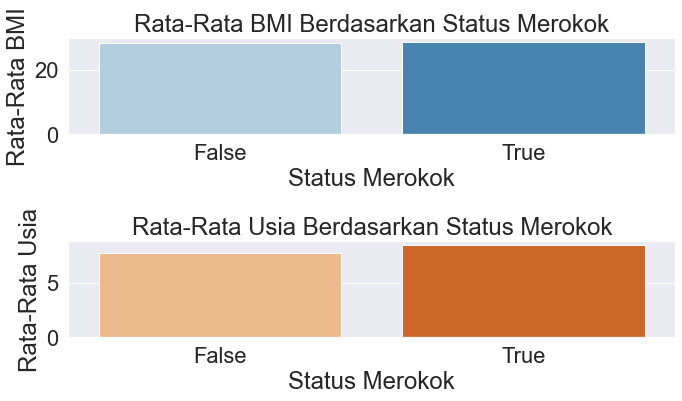

In [47]:
# Mengelompokkan data berdasarkan kolom 'Smoker' (perokok dan non-perokok) dan menghitung rata-rata BMI dan Age
grouped_data = df.groupby('Smoker')[['BMI', 'Age']].mean().reset_index()

# Menghitung proporsi perokok dan non-perokok
smoker_counts = df['Smoker'].value_counts(normalize=True)

# Membuat bar chart
plt.figure(figsize=(10, 6))

# Bar chart untuk rata-rata BMI dan Age
plt.subplot(2, 1, 1)
sns.barplot(data=grouped_data, x='Smoker', y='BMI', palette='Blues')
plt.title('Rata-Rata BMI Berdasarkan Status Merokok')
plt.xlabel('Status Merokok')
plt.ylabel('Rata-Rata BMI')

plt.subplot(2, 1, 2)
sns.barplot(data=grouped_data, x='Smoker', y='Age', palette='Oranges')
plt.title('Rata-Rata Usia Berdasarkan Status Merokok')
plt.xlabel('Status Merokok')
plt.ylabel('Rata-Rata Usia')

plt.tight_layout()

# Menampilkan bar chart
plt.show()

Kesimpulan : Dari bar Rata - rata BMI, dapat dilihat bahwa rata-rata BMI untuk perokok (warna biru) lebih tinggi daripada rata-rata BMI untuk non-perokok (warna jingga). Ini menunjukkan bahwa perokok cenderung memiliki rata-rata BMI yang lebih tinggi daripada non-perokok dalam dataset tersebut.

# 13-level Age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older.
Dari bar Rata - rata usia, dapat dilihat bahwa rata-rata usia untuk perokok (warna oren) lebih tinggi daripada rata-rata usia untuk non-perokok (warna oren muda).
Ini menunjukkan bahwa perokok cenderung memiliki rata-rata usia yang lebih tinggi daripada non-perokok dalam dataset Anda.

Why (Mengapa): Mengapa kebanyakan yang terkenak diabetes dipengaruhi faktor dari rokok?

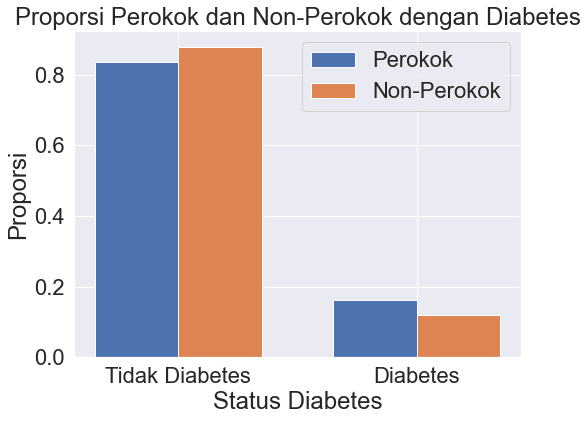

In [48]:
# Menghitung proporsi perokok yang menderita diabetes
smoker_diabetes_counts = df[df['Smoker'] == 1]['Diabetes_binary'].value_counts(normalize=True)
non_smoker_diabetes_counts = df[df['Smoker'] == 0]['Diabetes_binary'].value_counts(normalize=True)

# Menggambarkan bar chart
fig, ax = plt.subplots(figsize=(8, 6))

width = 0.35
x = range(2)

ax.bar(x, smoker_diabetes_counts, width, label='Perokok')
ax.bar([i + width for i in x], non_smoker_diabetes_counts, width, label='Non-Perokok')

ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(['Tidak Diabetes', 'Diabetes'])
ax.set_xlabel('Status Diabetes')
ax.set_ylabel('Proporsi')

ax.legend()

plt.title('Proporsi Perokok dan Non-Perokok dengan Diabetes')
plt.show()

Kesimpulan : Dapat dilihat dari bar chart di atas bahwa, Perokok yang menderita diabetes lebih tinggi daripada non-perokok.
Ini menunjukkan bahwa merokok mungkin memiliki pengaruh pada risiko diabetes.

Who (Siapa): Siapa yang berpotensi terkenak penyakit diabetes?

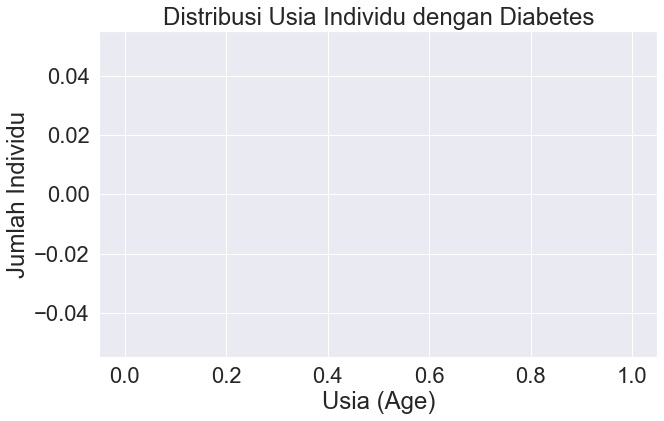

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data hanya untuk individu dengan diabetes (Diabetes_binary = 2)
diabetes_data = df[df['Diabetes_binary'] == 2]

# Membuat histogram
plt.figure(figsize=(10, 6))

# Menggunakan bins (batang) sebanyak 20 untuk melihat sebaran usia lebih rinci
plt.hist(diabetes_data['Age'], bins=20, color='green', alpha=0.7)

plt.xlabel('Usia (Age)')
plt.ylabel('Jumlah Individu')
plt.title('Distribusi Usia Individu dengan Diabetes')
plt.show()


Where (Dimana): Dimana letak potensi untuk orang tersebut di nyatakan terkena diabetes.

In [81]:
import pandas as pd

# Mengimpor data dari file atau sumber data Anda
# Jika data Anda sudah dalam DataFrame, Anda bisa langsung melompati langkah ini
# df = pd.read_csv('nama_file.csv')

# Filter data hanya untuk individu dengan tekanan darah tinggi (HighBP = 1.0)
high_bp_data = df[df['HighBP'] == 1.0]

# Menghitung berapa persentase dari individu dengan tekanan darah tinggi yang juga memiliki diabetes
percentage_with_diabetes = (len(high_bp_data[high_bp_data['Diabetes_binary'] == 2]) / len(high_bp_data)) * 100

print(f'Persentase individu dengan tekanan darah tinggi yang memiliki diabetes: {percentage_with_diabetes:.2f}%')


Persentase individu dengan tekanan darah tinggi yang memiliki diabetes: 0.00%


Statistik Deskriptif

In [89]:
print('Rata - rata BMI sekitar :',df['BMI'].mean())
print('Nilai tengah BMI sekitar :',df['BMI'].median())
print('Modus BMI sekitar :',df['BMI'].mode().values[0])
print('Variance BMI sekitar :',df['BMI'].var())
print('Standar Deviasi BMI sekitar :',df['BMI'].std())

Rata - rata BMI sekitar : 28.382363607694735
Nilai tengah BMI sekitar : 27.0
Modus BMI sekitar : 27.0
Variance BMI sekitar : 43.67483904767715
Standar Deviasi BMI sekitar : 6.608694201404477


In [90]:
print(f"Skewness: {df['BMI'].skew()}")
print(f"Kurtosis: {df['BMI'].kurtosis()}")

Skewness: 2.122003758291108
Kurtosis: 10.997473294335112


<AxesSubplot:>

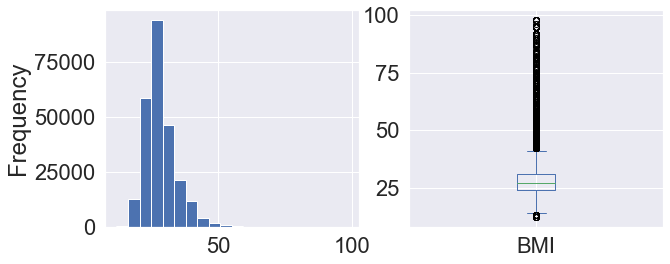

In [91]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['BMI'].plot(kind='hist',bins=20,ax=ax[0])
df['BMI'].plot(kind='box',ax=ax[1])

Tukey's Rule

In [92]:
# Menghitung nilai IQR
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3-q1

# Menghitung batas atas dan batas bawah
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 41.50
Lower Boundary: 13.50


In [93]:
outlier = df['BMI'][(df['BMI']<low_bound) | (df['BMI']>up_bound)]
no_outlier = df['BMI'][(df['BMI']>=low_bound) & (df['BMI']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["BMI"]):.2f}%')

Percentage of outliers: 3.88%


<AxesSubplot:>

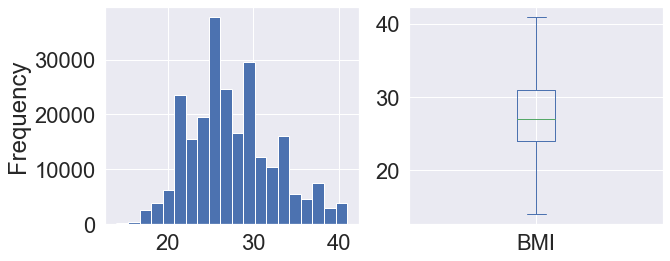

In [94]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Kesimpulan : Dengan menggunakan Tukey Rule, dapat disimpulkan bahwa outlier dalam kolom "BMI" diidentifikasi sebagai data yang berada di luar batas atas (Upper Boundary) atau di bawah batas bawah (Lower Boundary) yang telah dihitung. 

Statistik Inferensial

Apakah ada hubungan antara tekanan darah tinggi dan diabetes? Menggunakan metode chi-square test.

In [103]:
# mengimport package scipy
from scipy import stats
from scipy.stats import chi2_contingency

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,no diabetes,1.0,1.0,1.0,40.0,True,False,0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,Female,9,4.0,3.0
1,no diabetes,0.0,0.0,0.0,25.0,True,False,0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,Female,7,6.0,1.0
2,no diabetes,1.0,1.0,1.0,28.0,False,False,0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,Female,9,4.0,8.0
3,no diabetes,1.0,0.0,1.0,27.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,Female,11,3.0,6.0
4,no diabetes,1.0,1.0,1.0,24.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,Female,11,5.0,4.0


In [104]:
# Mengganti value other pada kolom Sex menjadi NAN
df['Sex'].replace('Other', pd.NA, inplace=True)

# Menghapus value NAN
df = df.dropna()
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,no diabetes,1.0,1.0,1.0,40.0,True,False,0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,Female,9,4.0,3.0
1,no diabetes,0.0,0.0,0.0,25.0,True,False,0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,Female,7,6.0,1.0
2,no diabetes,1.0,1.0,1.0,28.0,False,False,0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,Female,9,4.0,8.0
3,no diabetes,1.0,0.0,1.0,27.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,Female,11,3.0,6.0
4,no diabetes,1.0,1.0,1.0,24.0,False,False,0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,Female,11,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,no diabetes,1.0,1.0,1.0,45.0,False,False,0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,Male,5,6.0,7.0
253676,prediabetes,1.0,1.0,1.0,18.0,False,False,0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,Female,11,2.0,4.0
253677,no diabetes,0.0,0.0,1.0,28.0,False,False,0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,Female,2,5.0,2.0
253678,no diabetes,1.0,0.0,1.0,23.0,False,False,0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,Male,7,5.0,1.0


In [105]:
df.to_csv('cleandatabersih.csv', index = False) 
print("Berhasil")

Berhasil


In [106]:
#Contingency Table
contingency_table = pd.crosstab(df['Sex'],df['Smoker'])
contingency_table

Smoker,False,True
Sex,,
Female,84915,57059
Male,56342,55364


In [113]:
# Misalkan df adalah DataFrame Anda yang telah dimuat dengan dataset
contingency_table = pd.crosstab(df['HighBP'], df['Diabetes_binary'])

# Menghitung p-value
chi2, p, _, _ = chi2_contingency(contingency_table)

# Menampilkan p-value
print(f"P-Value: {p}")


P-Value: 0.0


In [112]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('cleandatabersih.csv')

contingency_table = pd.crosstab(df['HighBP'], df['Diabetes_binary'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"P-Value: {p}")


P-Value: 0.0


H0 : tidak ada hubungan antara kolom "HighBP" (High Blood Pressure) dan kolom "Diabetes_binary" dalam dataset. Dengan kata lain, tidak ada hubungan antara tekanan darah tinggi dan diabetes.

H1 : bahwa ada hubungan antara kolom "HighBP" dan "Diabetes" dalam dataset. Dengan kata lain, ada hubungan yang signifikan antara tekanan darah tinggi dan diabetes.

Kesimpulan : ada hubungan yang signifikan antara tekanan darah tinggi dan diabetes.

Kesimpulan dataset ini adalah faktor merokok dapat berpengaruh terhadap penyakit diabetes. Dengan menggunakan uji chi-square menunjukkan bahwa ada hubungan yang signifikan antara tekanan darah tinggi (HighBP) dan diabetes. Menjalani gaya hidup sehat adalah kunci agar terhindar nya dari penyakit tersebut. 

### Link Tableau

https://public.tableau.com/app/profile/muhammad.furqon.pakpahan/vizzes